In [4]:
import numpy as np
import pandas as pd

pd.__version__


'2.3.1'

In [5]:
file_path = 'course_lead_scoring.csv'

df=pd.read_csv(file_path, na_values=['nan'])
display(len(df))
#First overvuew of data
display(df.head())
#Column list
print(df.columns)
print(" ")

#Types
print("Types")
display(df.dtypes)
print(" ")

#Row size
print("Row size")
print(df.shape[0])
print(" ")

#Index
print("Dataframe index")
display(df.index)
print(" ")

#Clean data
# like series it also has the str method for doing string 
# manipulation what we can do now is to apply the same 
# string function to all column names
df.columns = df.columns.str.lower().str.replace(' ','_')
#display(df.head())

#Column_list
column_list_orig=df.columns.tolist()
print("Null column check")
display(df.isna().any())

1462

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


Index(['lead_source', 'industry', 'number_of_courses_viewed', 'annual_income',
       'employment_status', 'location', 'interaction_count', 'lead_score',
       'converted'],
      dtype='object')
 
Types


lead_source                  object
industry                     object
number_of_courses_viewed      int64
annual_income               float64
employment_status            object
location                     object
interaction_count             int64
lead_score                  float64
converted                     int64
dtype: object

 
Row size
1462
 
Dataframe index


RangeIndex(start=0, stop=1462, step=1)

 
Null column check


lead_source                  True
industry                     True
number_of_courses_viewed    False
annual_income                True
employment_status            True
location                     True
interaction_count           False
lead_score                  False
converted                   False
dtype: bool

In [6]:
print(df.columns[df.isna().any()].tolist())
print(df.dtypes["annual_income"])
df2=df.copy()
category_list=[]
numerical_list=[]
#Null value replacer
for col in df2.columns[df2.isna().any()].tolist():
    #print(df2.dtypes[col])
    if df2.dtypes[col]=="float64":
        #print(1)
        numerical_list.append(col)
        df2[col]=df2[col].fillna(0.0)
    elif df2.dtypes[col]=="int64":
        df2[col]=df2[col].fillna(0)
        numerical_list.append(col)
    elif df2.dtypes[col]=="object":
        #print(1)
        df2[col]=df2[col].fillna('NA')
        category_list.append(col)
        
#Check replacement has worked        
display(df2.head())
display(df2.isna().any())

#Define list of features
for col in df2.columns.tolist():
    if df2.dtypes[col]=="float64" or df2.dtypes[col]=="int64":
        numerical_list.append(col)
    elif df2.dtypes[col]=="object":
        category_list.append(col)
category_list = list(df2.dtypes[df2.dtypes == 'object'].index)
numerical_list = list(df2.dtypes[(df2.dtypes == 'float64') | (df2.dtypes == 'int64')].index)
numerical_list.remove('converted')
for c in category_list:
    df[c] = df[c].str.lower().str.replace(' ', '_')
display(numerical_list)

['lead_source', 'industry', 'annual_income', 'employment_status', 'location']
float64


,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NA,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NA,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


lead_source                 False
industry                    False
number_of_courses_viewed    False
annual_income               False
employment_status           False
location                    False
interaction_count           False
lead_score                  False
converted                   False
dtype: bool

['number_of_courses_viewed',
 'annual_income',
 'interaction_count',
 'lead_score']

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression


df_full_train, df_test = train_test_split(df2, test_size=1/5, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=1/4, random_state=1)

#Check set ratios
print(df_train.shape[0]/df2.shape[0])
print(df_val.shape[0]/df2.shape[0])
print(df_test.shape[0]/df2.shape[0])

#Reset indices
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

#Y sets
y_train_orig = df_train.converted.values
y_val_orig = df_val.converted.values
y_test_orig = df_test.converted.values

y_train = np.log1p(df_train.converted.values)
y_val = np.log1p(df_val.converted.values)
y_test = np.log1p(df_test.converted.values)


df_train0=df_train.copy()
#Delete converted from df
del df_train['converted']
del df_val['converted']
del df_test['converted']

0.5991792065663475
0.20041039671682626
0.20041039671682626


In [8]:
from sklearn.metrics import auc, roc_auc_score
feature_auc_scores={}

for feature in numerical_list:
    # Use the feature as the score (prediction)
    # The roc_auc_score function expects a 1D array of scores.
    y_scores = df_train[feature]
    
    # Calculate the AUC with the training ground truth
    # The higher the AUC, the more important the feature
      
    auc_score = roc_auc_score(y_train_orig, y_scores)
    if auc_score < 0.5:
        y_scores = -df_train[feature]
        auc_score = roc_auc_score(y_train_orig, y_scores)
    feature_auc_scores[feature] = auc_score


    print(feature,auc_score)

print('Maximum AOC Feature:', max(feature_auc_scores))

number_of_courses_viewed 0.7635680590007088
annual_income 0.5519578313253012
interaction_count 0.738270176293409
lead_score 0.6144993577250176
Maximum AOC Feature: number_of_courses_viewed


In [9]:
#Logistic regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

#One-hot encoding
from sklearn.feature_extraction import DictVectorizer

display(numerical_list)
display(category_list)

numerical_list2 = numerical_list

dv = DictVectorizer(sparse=False)

train_dict = df_train[category_list + numerical_list2].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[category_list + numerical_list2].to_dict(orient='records')
X_val = dv.transform(val_dict)

model.fit(X_train, y_train_orig)



['number_of_courses_viewed',
 'annual_income',
 'interaction_count',
 'lead_score']

['lead_source', 'industry', 'employment_status', 'location']

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [10]:
#Prediction
from sklearn.metrics import auc, roc_auc_score, roc_curve
model.intercept_[0]
model.coef_[0].round(3)
y_pred = model.predict_proba(X_val)[:,1]

print(roc_auc_score(y_val_orig, y_pred))

fpr, tpr, thresholds = roc_curve(y_val_orig, y_pred)
print(auc(fpr, tpr))

0.8171316268814112
0.8171316268814112


C:\Users\3ir\AppData\Local\Temp\ipykernel_32076\484078265.py:20: RuntimeWarning: invalid value encountered in scalar divide
  p=tp/(tp+fp)


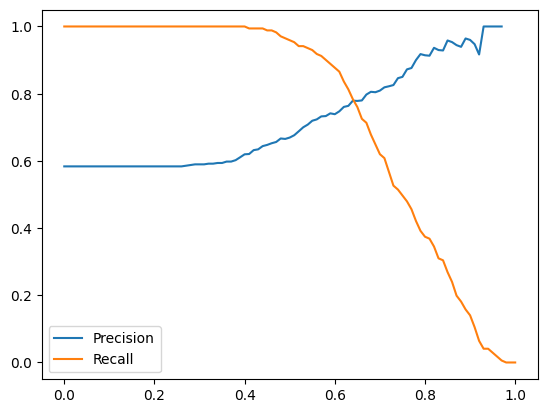

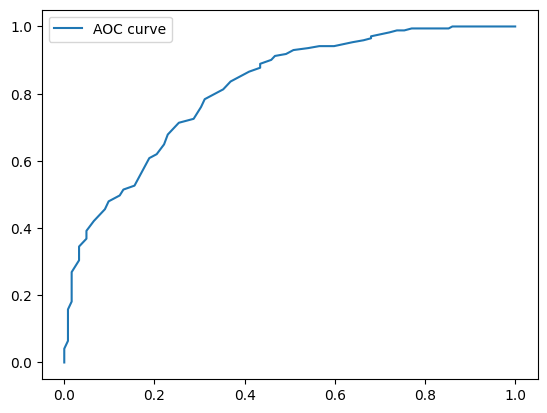

In [15]:
import matplotlib.pyplot as plt
#Make Confusion Table
thresholds = np.linspace(0, 1, 101)
#display(thresholds[1]-thresholds[0])
scores = []

for t in thresholds:
    actual_positive = (y_val_orig == 1)
    actual_negative = (y_val_orig == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()

    p=tp/(tp+fp)
    r=tp/(tp+fn)

    f=2*p*r/(p+r)
    
    scores.append((t, tp, fp, fn, tn,p,r,f))

columns = ['threshold', 'tp', 'fp', 'fn', 'tn','prec','rec','F1']
df_scores = pd.DataFrame(scores, columns=columns)

df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

df2=df_scores[['threshold','prec','rec','F1']]
    
plt.plot(df2.threshold, df_scores['prec'], label='Precision')
plt.plot(df2.threshold, df_scores['rec'], label='Recall')
plt.legend()
plt.show()

plt.plot(df_scores['fpr'],df_scores['tpr'], label='AOC curve')
plt.legend()
plt.show()

In [16]:

# Define the maximum acceptable difference
tolerance = 0.005

# Find the rows where the columns are approximately equal
approx_equal_rows = df2.loc[abs(df2['prec'] - df2['rec']) <= tolerance]

In [17]:
print(approx_equal_rows)

from sklearn.metrics import accuracy_score
y_pred0= model.predict(X_val)
acc3 = accuracy_score(y_val_orig, y_pred0)
display(np.round(acc3,4))

    threshold     prec       rec        F1
64       0.64  0.77907  0.783626  0.781341


np.float64(0.6997)

Max F1 threshold: 0.5700000000000001


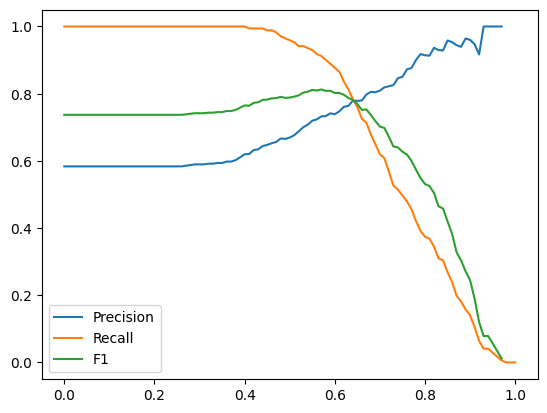

In [18]:
#F1 scoring
plt.plot(df2.threshold, df2['prec'], label='Precision')
plt.plot(df2.threshold, df2['rec'], label='Recall')
plt.plot(df2.threshold, df2['F1'], label='F1')
plt.legend()

max_index_col_A = df2['F1'].idxmax()
print('Max F1 threshold:',df2.threshold[max_index_col_A])

In [20]:
from tqdm.auto import tqdm
from sklearn.model_selection import KFold
n_splits = 5
def train(df_train, y_train, C=1.0):
    dicts = df_train[category_list + numerical_list2].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear',C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

def predict(df, dv, model):
    dicts = df[category_list + numerical_list2].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred
    
for C in tqdm([0.000001, 0.001, 1]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.converted.values
        y_val = df_val.converted.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))


  0%|          | 0/3 [00:00<?, ?it/s]

C=1e-06 0.560 +- 0.024
C=0.001 0.867 +- 0.029
C=1 0.822 +- 0.036


<generator object _BaseKFold.split at 0x000002130317D140>